In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# **PHASE 1: DATA EXPLORATION & UNDERSTANDING**

#### Step 1.1: Load and Understand the Dataset

In [ ]:
# Load CIFAR-10
print("Loading CIFAR-10 dataset...")
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print("✓ Dataset loaded!")
print(f"Training data: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test data: {X_test.shape}")
print(f"Test labels: {y_test.shape}")

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
✓ Dataset loaded!
Training data: (50000, 32, 32, 3)
Training labels: (50000, 1)
Test data: (10000, 32, 32, 3)
Test labels: (10000, 1)


#### Step 1.2: Define Class Names and Basic Info

In [ ]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print("\n" + "="*60)
print("DATASET INFORMATION")
print("="*60)

print(f"\nNumber of classes: {len(class_names)}")
print(f"Classes: {class_names}")

print(f"\nImage dimensions: {X_train[0].shape}")
print(f"  - Height: {X_train[0].shape[0]} pixels")
print(f"  - Width: {X_train[0].shape[1]} pixels")
print(f"  - Channels: {X_train[0].shape[2]} (RGB)")

print(f"\nPixel value range: [{X_train.min()}, {X_train.max()}]")
print(f"Data type: {X_train.dtype}")

print(f"\nTotal training images: {len(X_train):,}")
print(f"Total test images: {len(X_test):,}")


DATASET INFORMATION

Number of classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Image dimensions: (32, 32, 3)
  - Height: 32 pixels
  - Width: 32 pixels
  - Channels: 3 (RGB)

Pixel value range: [0, 255]
Data type: uint8

Total training images: 50,000
Total test images: 10,000


#### Step 1.3: Check Class Distribution

In [ ]:
# Flatten labels to remove extra array from each
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

print("\n" + "="*60)
print("CLASS DISTRIBUTION")
print("="*60)

# Counts how many images we have for each class
unique_train, counts_train = np.unique(y_train_flat, return_counts=True)

print("\nImages per class:")
for i in range(10):
    print(f"{class_names[i]}: {counts_train[i]} images")

print(f"\nMin images per class: {counts_train.min()}")
print(f"Max images per class: {counts_train.max()}")

if counts_train.min() == counts_train.max():
    print("\nDataset is balanced!")
else:
  print("\nDatase is unbalanced!")


CLASS DISTRIBUTION

Images per class:
airplane: 5000 images
automobile: 5000 images
bird: 5000 images
cat: 5000 images
deer: 5000 images
dog: 5000 images
frog: 5000 images
horse: 5000 images
ship: 5000 images
truck: 5000 images

Min images per class: 5000
Max images per class: 5000

Dataset is balanced!


#### Step 1.4: Visualize Class Distribution (Bar Chart)

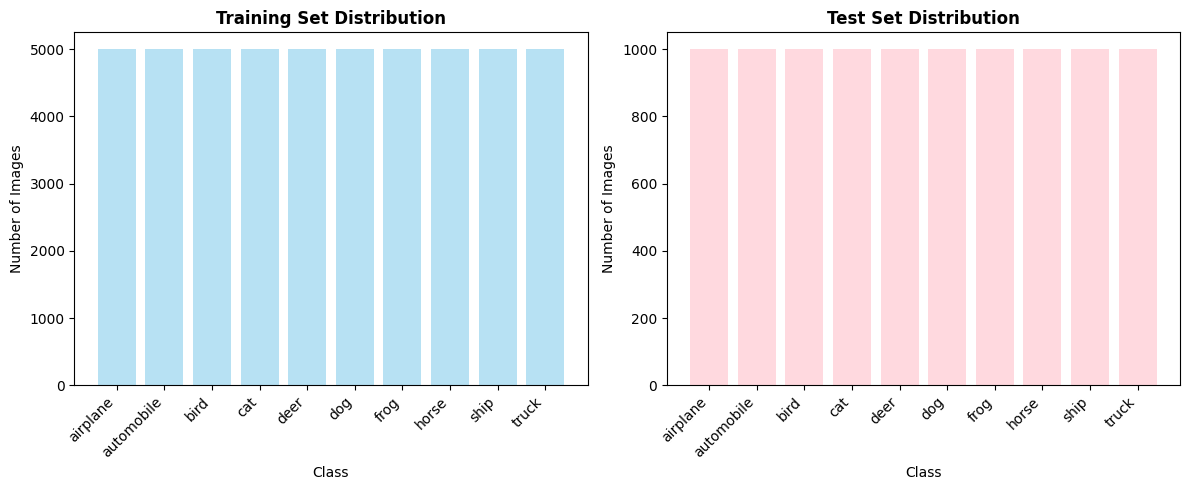

In [ ]:
# Visualize class distribution
plt.figure(figsize=(12, 5))

# Training set bar chart
plt.subplot(1, 2, 1)
plt.bar(range(10), counts_train, color='skyblue', alpha=0.6)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Training Set Distribution', fontweight='bold')
plt.xticks(range(10), class_names, rotation=45, ha='right')

# Test set bar chart
unique_test, counts_test = np.unique(y_test_flat, return_counts=True)
plt.subplot(1, 2, 2)
plt.bar(range(10), counts_test, color='pink', alpha=0.6)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Test Set Distribution', fontweight='bold')
plt.xticks(range(10), class_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Step 1.5: Visualize Sample Images


SAMPLE IMAGES VISUALIZATION


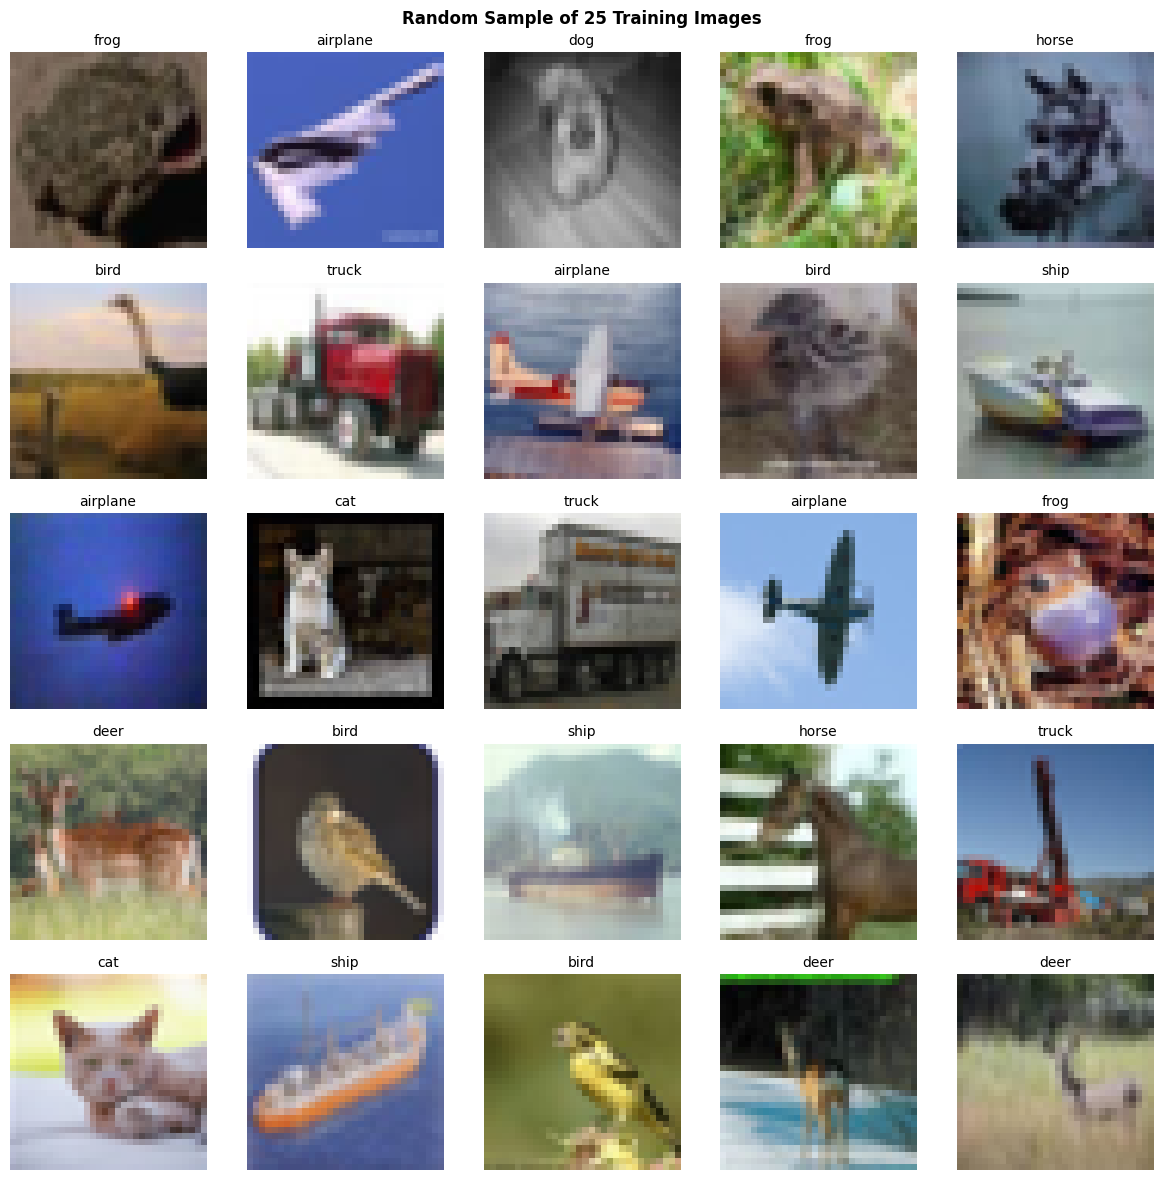

In [ ]:
print("\n" + "="*60)
print("SAMPLE IMAGES VISUALIZATION")
print("="*60)

# Display 25 random images to see what we're working with
plt.figure(figsize=(12, 12))

# Picks 25 random images
random_indices = np.random.choice(len(X_train), 25, replace=False)

#Display them in a 5*5 grid
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx])
    plt.title(f"{class_names[y_train_flat[idx]]}", fontsize=10)
    plt.axis('off')

plt.suptitle('Random Sample of 25 Training Images', fontweight='bold')
plt.tight_layout()
plt.show()

#### Step 1.6: Show One Image from Each Class

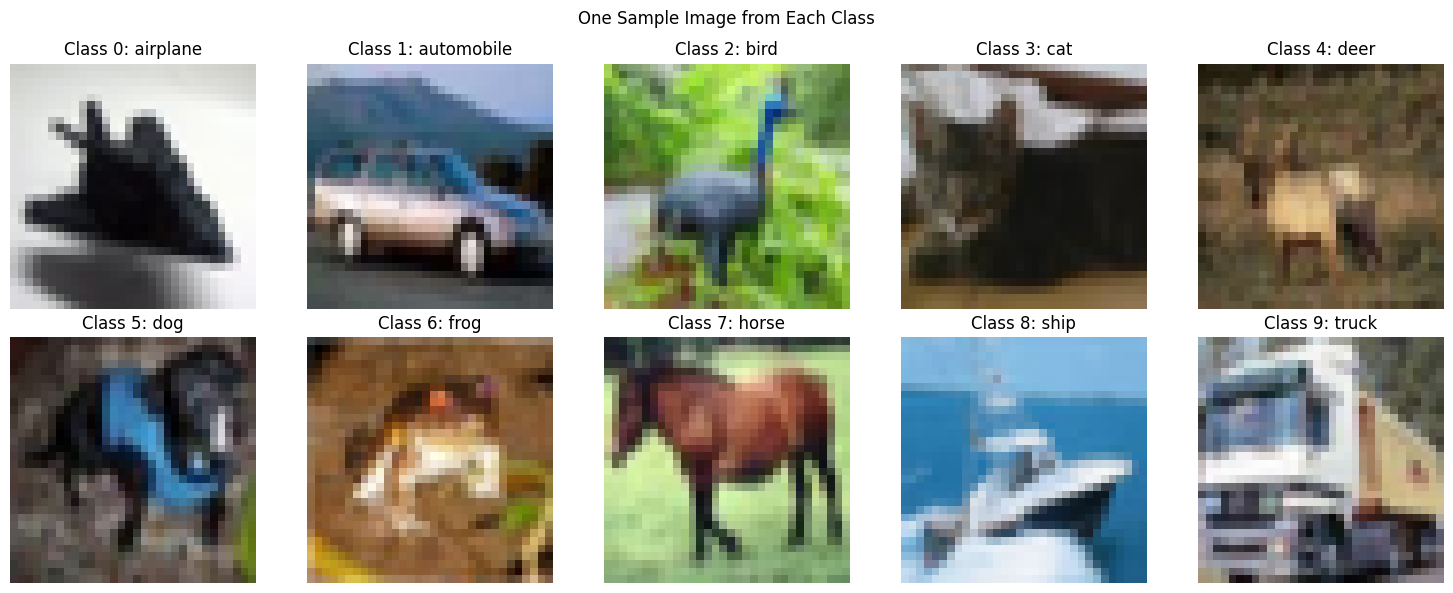

In [ ]:
# Display one sample from each class
plt.figure(figsize=(15, 6))

for class_id in range(10):
    # Find first image of this class
    idx = np.where(y_train_flat == class_id)[0][0]

    plt.subplot(2, 5, class_id + 1)
    plt.imshow(X_train[idx])
    plt.title(f"Class {class_id}: {class_names[class_id]}")
    plt.axis('off')

plt.suptitle('One Sample Image from Each Class')
plt.tight_layout()
plt.show()

#### Step 1.7:  Analyze Pixel Statistics

In [ ]:
print("\n" + "="*60)
print("PIXEL STATISTICS ANALYSIS")
print("="*60)

# Mean values for each color channel
# first dot is 50000 images, second; 32 rows, third; 32 cols, forth; red channel only

mean_r = X_train[:, :, :, 0].mean()
mean_g = X_train[:, :, :, 1].mean()
mean_b = X_train[:, :, :, 2].mean()

print(f"Average Red: {mean_r:.2f}")
print(f"Average Green: {mean_g:.2f}")
print(f"Average Blue: {mean_b:.2f}")

# Overall stats
print(f"\nOverall average: {X_train.mean():.2f}")
print(f"Pixel range: {X_train.min()} to {X_train.max()}")


PIXEL STATISTICS ANALYSIS
Average Red: 125.31
Average Green: 122.95
Average Blue: 113.87

Overall average: 120.71
Pixel range: 0 to 255


#### Step 1.8:  Create summary report

In [ ]:
print("\n" + "="*60)
print("PHASE 1 SUMMARY REPORT")
print("="*60)

# Summary
print("\nDataset: CIFAR-10")
print(f"Total images: {len(X_train) + len(X_test):,}")
print(f"  - Training: {len(X_train):,}")
print(f"  - Test: {len(X_test):,}")

print(f"\nImage size: 32x32 pixels (RGB)")
print(f"Pixel values: 0-255")

print(f"\nClasses ({len(class_names)}):")
for i in range(len(class_names)):
    print(f"  {i}: {class_names[i]}")

print("\nNotes:")
print("  - All classes have equal images (balanced)")
print("  - Ready to move to preprocessing")

print("\n" + "="*50)


PHASE 1 SUMMARY REPORT

Dataset: CIFAR-10
Total images: 60,000
  - Training: 50,000
  - Test: 10,000

Image size: 32x32 pixels (RGB)
Pixel values: 0-255

Classes (10):
  0: airplane
  1: automobile
  2: bird
  3: cat
  4: deer
  5: dog
  6: frog
  7: horse
  8: ship
  9: truck

Notes:
  - All classes have equal images (balanced)
  - Ready to move to preprocessing



# **PHASE 2: DATA PREPROCESSING**

#### Step 2.1: Normalize Pixel Values

In [ ]:
print("\n" + "="*60)
print("Normalizing pixel value")
print("="*60)

# Normalize pixel values from 0-255 to 0-1
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

print("\nBefore normalization:")
print(f"Range: {X_train.min()} to {X_train.max()}")

print("\nAfter normalization:")
print(f"Range: {X_train_norm.min()} to {X_train_norm.max()}")


Normalizing pixel value

Before normalization:
  Range: 0 to 255

After normalization:
  Range: 0.0 to 1.0


#### Step 2.2:  Convert Labels to One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

print("\n" + "="*60)
print("One-Hot Encoding")
print("="*60)

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train_flat, 10)
y_test_cat = to_categorical(y_test_flat, 10)

print("Before one-hot encoding:")
print(f"  Shape: {y_train_flat.shape}")
print(f"  First 5 labels: {y_train_flat[:5]}")

print("\nAfter one-hot encoding:")
print(f"  Shape: {y_train_cat.shape}")
print(f"  First label: {y_train_cat[0]}")

# Compare one label before and after
#totally opt; prolly remove this block
'''print("\nExample:")
print(f"Original label: {y_train_flat[0]}")
print(f"Class name: {class_names[y_train_flat[0]]}")
print(f"One-hot encoded: {y_train_cat[0]}")'''


One-Hot Encoding
Before one-hot encoding:
  Shape: (50000,)
  First 5 labels: [6 9 9 4 1]

After one-hot encoding:
  Shape: (50000, 10)
  First label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Example:
Original label: 6
Class name: frog
One-hot encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Step 2.3: Split training data into train + validation

In [ ]:
from sklearn.model_selection import train_test_split

print("\n" + "="*60)
print("Splitting; train/validation/test")
print("="*60)

# Split training data: 80% train, 20% validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_norm,
    y_train_cat,
    test_size=0.2,
    random_state=42
)

print(f"\nTraining set: {X_train_final.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test_norm.shape}")


Splitting; train/validation/test

Training set: (40000, 32, 32, 3)
Validation set: (10000, 32, 32, 3)
Test set: (10000, 32, 32, 3)


#### Step 2.4: PHASE 2 SUMMARY

In [ ]:
# Check final shapes
print("\n" + "="*60)
print("PHASE 2 SUMMARY REPORT")
print("="*60)

print("\nFinal dataset shapes:")
print(f"  Training images: {X_train_final.shape}")
print(f"  Training labels: {y_train_final.shape}")
print(f"  Validation images: {X_val.shape}")
print(f"  Validation labels: {y_val.shape}")
print(f"  Test images: {X_test_norm.shape}")
print(f"  Test labels: {y_test_cat.shape}")

print("\nData is ready for model training.")


PHASE 2 SUMMARY REPORT

Final dataset shapes:
  Training images: (40000, 32, 32, 3)
  Training labels: (40000, 10)
  Validation images: (10000, 32, 32, 3)
  Validation labels: (10000, 10)
  Test images: (10000, 32, 32, 3)
  Test labels: (10000, 10)

Data is ready for model training.


# **PHASE 3: MODEL BUILDING**

#### Step 3.1: Build Baseline Model

In [ ]:
from tensorflow.keras import models, layers

print("\n" + "="*60)
print("Baseline model building")
print("="*60)

# Building first CNN baseline model

baseline_model = models.Sequential()

# Convolutional Block 1
baseline_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
baseline_model.add(layers.MaxPooling2D((2,2)))

# Convolutional Block 2
baseline_model.add(layers.Conv2D(64, (3,3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2,2)))

# Convolutional Block 3
baseline_model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Flatten and Fully Connected Layers
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(64, activation='relu'))
baseline_model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Model summary
print("\nCNN Model Architecture (Baseline)")
baseline_model.summary()

# Compiling the CNN model
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\nCNN model compiled successfully.")



Baseline model building

CNN Model Architecture (Baseline)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)


CNN model compiled successfully.


#### Step 3.2: Training Baseline Model

In [ ]:
# Training the baseline CNN model
print("Starting training for the baseline model")

# fitting the model
history_baseline = baseline_model.fit(
    X_train_final, y_train_final,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

print("Training finished successfully.")


Starting training for the baseline model...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 84ms/step - accuracy: 0.3036 - loss: 1.8767 - val_accuracy: 0.5194 - val_loss: 1.3340
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.5282 - loss: 1.3182 - val_accuracy: 0.5754 - val_loss: 1.1982
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.5945 - loss: 1.1480 - val_accuracy: 0.6095 - val_loss: 1.0943
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6367 - loss: 1.0410 - val_accuracy: 0.6374 - val_loss: 1.0304
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.6570 - loss: 0.9684 - val_accuracy: 0.6471 - val_loss: 0.9912
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.6808 - loss: 0.9011 - val_accuracy: 0.6673 - val_loss: 0.9373
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7094 - loss: 0.8308 - val_accuracy: 0.6739 - val_loss: 0.9261
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81

In [ ]:
baseline_model.save("cnn_cifar10_baseline.keras")
print("Baseline model saved as cnn_cifar10_baseline.h5")

Baseline model saved as cnn_cifar10_baseline.h5


#### Step 3.3: Evaluate Baseline Model

In [ ]:
# Model Evaluation

print("\n" + "="*60)
print("Model Evaluation")
print("="*60)

print("Evaluating model on test data...")
test_loss, test_acc = baseline_model.evaluate(X_test_norm, y_test_cat)
print("\nTest Accuracy:", round(test_acc * 100, 2), "%")
print("Test Loss:", round(test_loss, 4))


Model Evaluation
Evaluating model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6998 - loss: 0.8806

Test Accuracy: 69.26 %
Test Loss: 0.8947


#### Step 3.4: Training History Visualization


Model Evaluation; plot


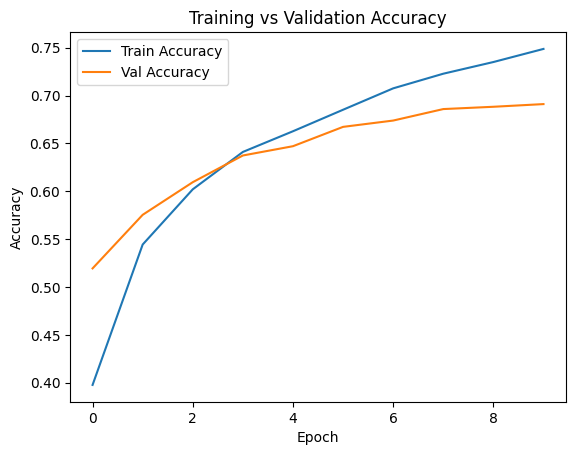

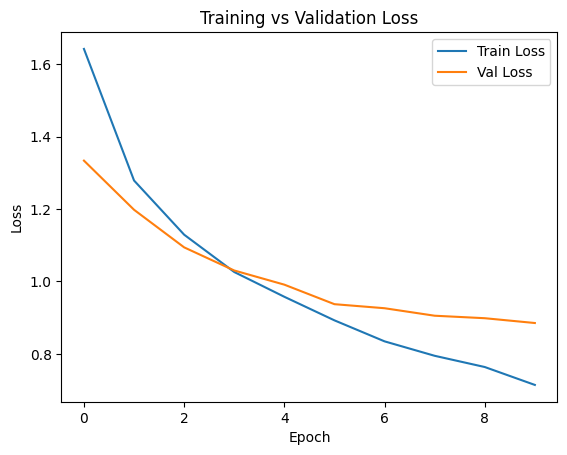

In [ ]:
# Training History
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("Model Evaluation; plot")
print("="*60)

# Accuracy
plt.plot(history_baseline.history['accuracy'], label='Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Step 3.5: Sample Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

Model Evaluation; prediction


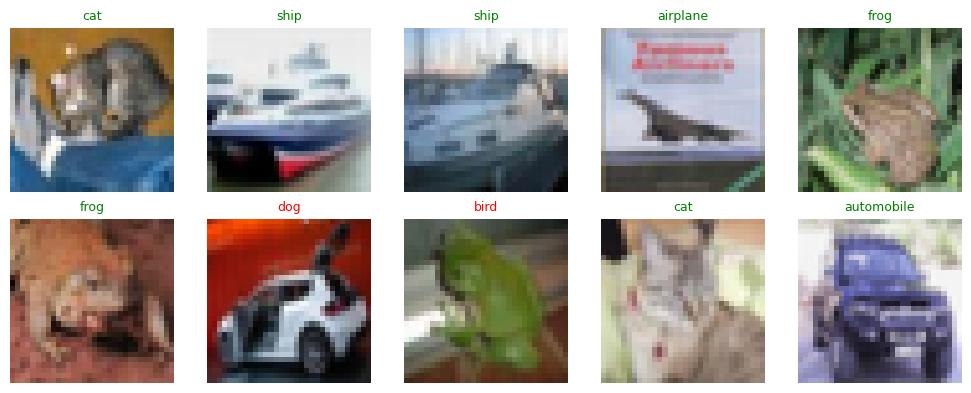

In [ ]:
# Making Predictions
predictions = baseline_model.predict(X_test_norm[:10])

print("\n" + "="*60)
print("Model Evaluation; prediction")
print("="*60)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    pred_class = np.argmax(predictions[i])
    true_class = y_test_flat[i]

    color = 'green' if pred_class == true_class else 'red'
    plt.title(class_names[pred_class], color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
baseline_model.save("cnn_cifar10_baseline.keras")

#### Step 3.6: Build Improved Model

In [ ]:
from tensorflow.keras import models, layers

print("\n" + "="*60)
print("Improved model building")
print("="*60)

improved_model = models.Sequential()

# First Conv Block
improved_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.MaxPooling2D((2, 2)))
improved_model.add(layers.Dropout(0.25))

# Second Conv Block
improved_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.MaxPooling2D((2, 2)))
improved_model.add(layers.Dropout(0.25))

# Third Conv Block
improved_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.MaxPooling2D((2, 2)))
improved_model.add(layers.Dropout(0.25))

# Fully Connected Layers
improved_model.add(layers.Flatten())
improved_model.add(layers.Dense(128, activation='relu'))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.Dropout(0.5))
improved_model.add(layers.Dense(10, activation='softmax'))

# Summary
improved_model.summary()

# Compiling the model
improved_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print("Improved model is ready to train.")



Improved model building


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,018 (621.16 KB)

 Trainable params: 158,122 (617.66 KB)

 Non-trainable params: 896 (3.50 KB)

Improved model is ready to train.


#### Step 3.7: Training Improved Model

In [ ]:
# Training the baseline CNN model
# fitting the model
history_improved = improved_model.fit(
    X_train_final, y_train_final,
    epochs=15,
    batch_size=64,
    validation_data=(X_val, y_val)
)

print("Training finished successfully.")

Starting training for the improved model...
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 255ms/step - accuracy: 0.2687 - loss: 2.3325 - val_accuracy: 0.4499 - val_loss: 1.4920
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 257ms/step - accuracy: 0.4749 - loss: 1.4646 - val_accuracy: 0.5246 - val_loss: 1.2775
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 261ms/step - accuracy: 0.5552 - loss: 1.2511 - val_accuracy: 0.6023 - val_loss: 1.1033
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 260ms/step - accuracy: 0.6125 - loss: 1.1054 - val_accuracy: 0.6468 - val_loss: 0.9975
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 262ms/step - accuracy: 0.6392 - loss: 1.0327 - val_accuracy: 0.6578 - val_loss: 0.9643
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 255ms/step - accuracy: 0.6675 - loss: 0.9534 - val_accuracy: 0.7005 - val_loss: 0.8420
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.6790 - loss: 0.9229 - val_accuracy: 0.6767 - val_loss: 0.9409
Epoch 8/15
625/625 ━━━━━━━━━━━━━

In [ ]:
# Save the improved model
improved_model.save("cnn_cifar10_improved.keras")
print("Improved model saved as cnn_cifar10_improved.keras")

Improved model saved as cnn_cifar10_improved.keras


#### Step 3.8: Evaluate Improved Model

In [ ]:
# Model Evaluation

print("\n" + "="*60)
print("Model Evaluation")
print("="*60)

print("Evaluating model on test data...")
test_loss, test_acc = improved_model.evaluate(X_test_norm, y_test_cat)
print("\nTest Accuracy:", round(test_acc * 100, 2), "%")
print("Test Loss:", round(test_loss, 4))


Model Evaluation
Evaluating model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7308 - loss: 0.7886

Test Accuracy: 73.07 %
Test Loss: 0.7828


#### Step 3.9: Visualize training history Improved model


Model Evaluation; plot


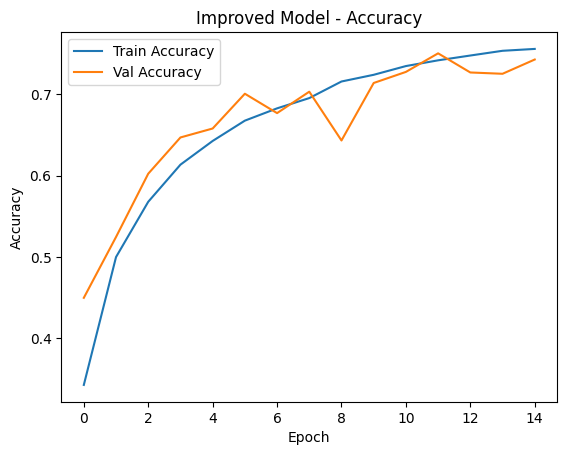

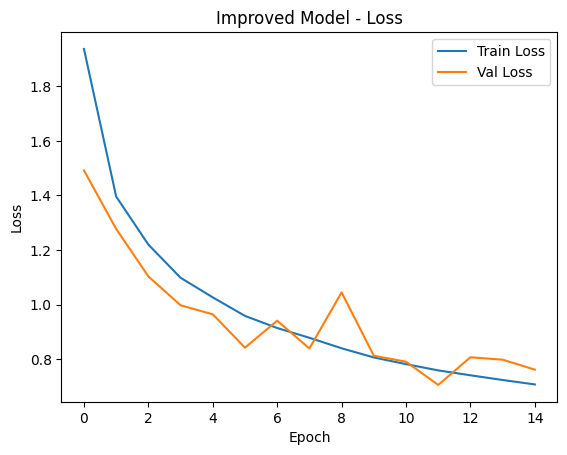

In [ ]:
# Plot Training History
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("Model Evaluation; plot")
print("="*60)

# Accuracy
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Val Accuracy')
plt.title('Improved Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Val Loss')
plt.title('Improved Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Step 3.10: Improved model sample prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step

Model Evaluation; prediction


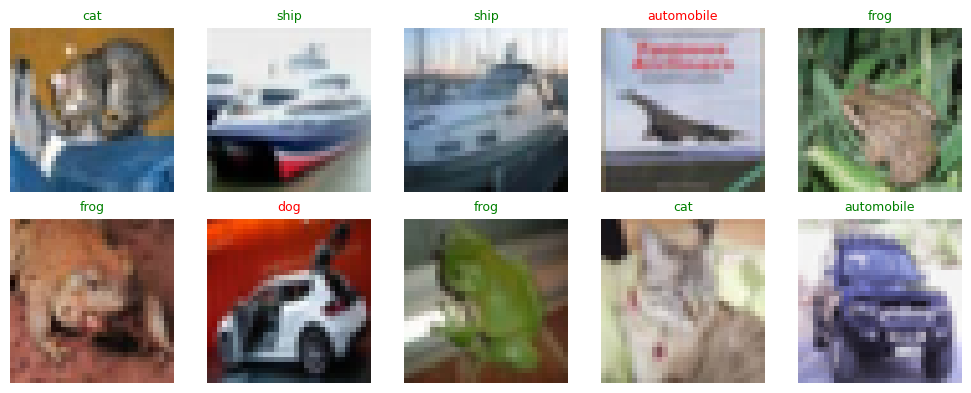

In [ ]:
# Make some predictions
predictions = improved_model.predict(X_test_norm[:10])

print("\n" + "="*60)
print("Model Evaluation; prediction")
print("="*60)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    pred_class = np.argmax(predictions[i])
    true_class = y_test_flat[i]

    color = 'green' if pred_class == true_class else 'red'
    plt.title(class_names[pred_class], color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

# **PHASE 4: EVALUATION**

#### Step 4.1 Compare Test Accuracy

In [ ]:
from tensorflow.keras.models import load_model
baseline_model = load_model("cnn_cifar10_baseline.keras")

In [ ]:
from tensorflow.keras.models import load_model
improved_model = load_model("cnn_cifar10_improved.keras")

In [ ]:
print("Testing the baseline model...")
baseline_loss, baseline_acc = baseline_model.evaluate(X_test_norm, y_test_cat)
print(f"Baseline Accuracy: {baseline_acc*100:.2f}%")
print(f"Baseline Loss: {baseline_loss:.4f}\n")

print("Testing the improved model...")
improved_loss, improved_acc = improved_model.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"Improved Accuracy: {improved_acc*100:.2f}%")
print(f"Improved Loss: {improved_loss:.4f}\n")

Testing the baseline model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6998 - loss: 0.8806
Baseline Accuracy: 69.26%
Baseline Loss: 0.8947

Testing the improved model...
Improved Accuracy: 73.07%
Improved Loss: 0.7828



#### Step 4.2 A SUMMARY

In [ ]:
# Quick summary table
print("Model Comparison:")
print(f"{'Model':15s} {'Accuracy':10s} {'Loss':10s}")
print(f"{'Baseline':15s} {baseline_acc*100:10.2f} {baseline_loss:10.4f}")
print(f"{'Improved':15s} {improved_acc*100:10.2f} {improved_loss:10.4f}")

Model Comparison:
Model           Accuracy   Loss      
Baseline             69.26     0.8947
Improved             73.07     0.7828


#### Step 4.3 VISUALISING PREDICTIONS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


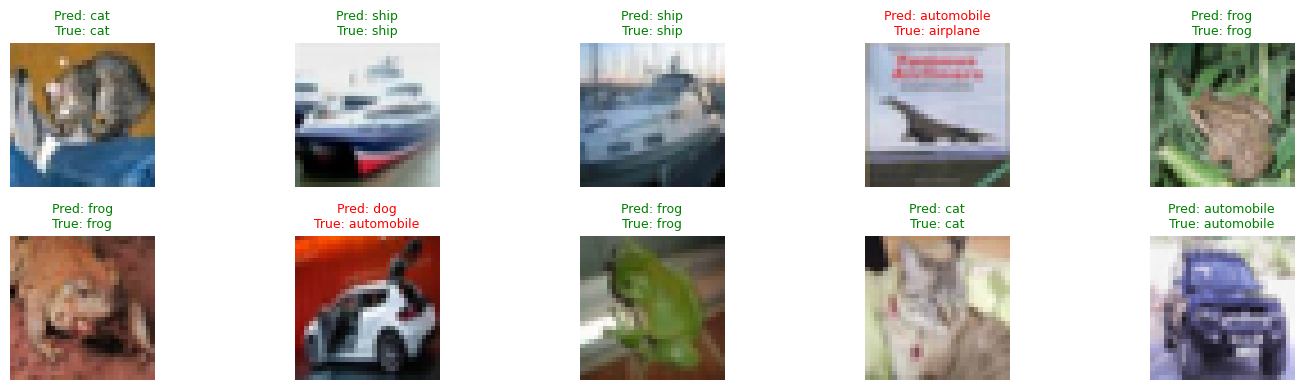

In [ ]:
# Get predictions for baseline and improved models
preds_baseline = baseline_model.predict(X_test_norm[:10])
preds_improved = improved_model.predict(X_test_norm[:10])

plt.figure(figsize=(15, 4))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])  # show original image

    # Show predictions from the improved model
    pred_class = np.argmax(preds_improved[i])
    true_class = y_test_flat[i]

    color = 'green' if pred_class == true_class else 'red'
    plt.title(f"Pred: {class_names[pred_class]}\nTrue: {class_names[true_class]}",
              color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()
